<a href="https://colab.research.google.com/github/haticeaydinn/machine-learning-projects/blob/master/Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Employee Turnover with scikit-learn**
---
This is a guided project by Coursera. I will apply decision trees and random forests using scikit-learn and Python to build an employee churn prediction application with interactive controls. I will accomplish this with the help of following tasks in the project:

*   Introduction and Import Libraries
*   Exploratory Data Analysis
*   Encode Categorical Features
*   Visualize Class Imbalance
*   Create Training and Test Sets
*   Build a Decision Tree Classifier with Interactive Controls
*   Build a Random Forest Classifier with Interactive Controls
*   Feature Importance Plots and Evaluation Metrics


**Import Libraries**

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
# pandas_profiling has some version issues I solved it with https://github.com/pandas-profiling/pandas-profiling/issues/183
!pip install -U pandas-profiling
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.8.0)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
# import file from google drive to colab

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
hr_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/employee_data.csv")

In [5]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Exploratory Data Analysis**

In [6]:
hr_data.profile_report(title='HR Data Report')

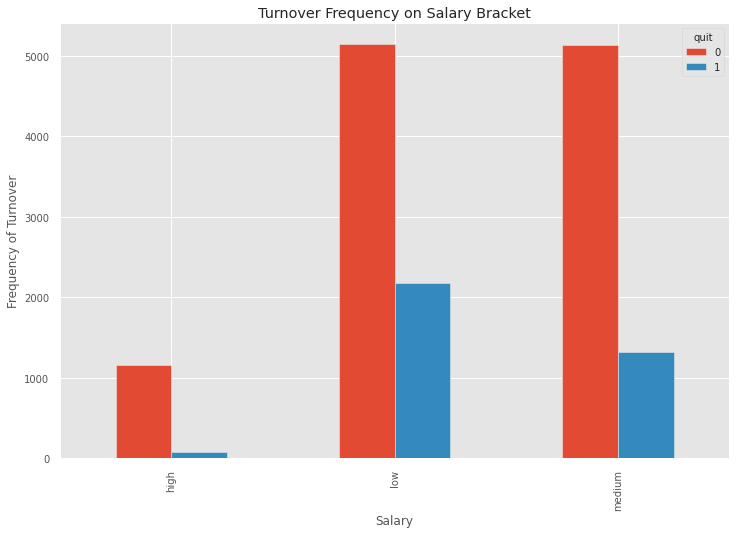

In [7]:
pd.crosstab(hr_data.salary, hr_data.quit).plot(kind='bar')
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()

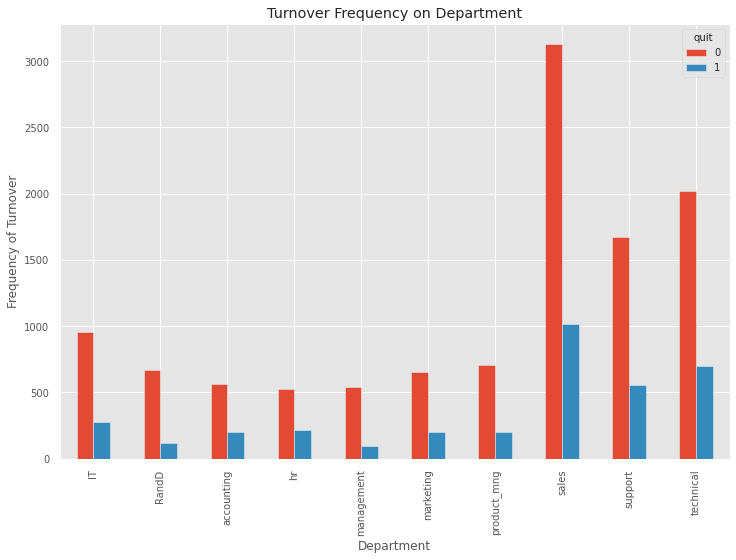

In [8]:
pd.crosstab(hr_data.department, hr_data.quit).plot(kind='bar')
plt.title('Turnover Frequency on Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

**Encode Categorical Features**

We need to encode our categorical variables because our models cannot understand
string or object type of variables. We need to turn them into some numeric values. We'll use dummys and one-hot encoding.

In [9]:
cat_var = ['department', 'salary']
for var in cat_var:
  cat_list = pd.get_dummies(hr_data[var], prefix=var)
  hr_data = hr_data.join(cat_list)

In [10]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [11]:
hr_data.drop(['department', 'salary'], axis=1, inplace=True)

In [12]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


**Visualize Class Imbalance**

In [13]:
!pip install -U yellowbrick
from yellowbrick.target import ClassBalance
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.6/dist-packages (1.1)


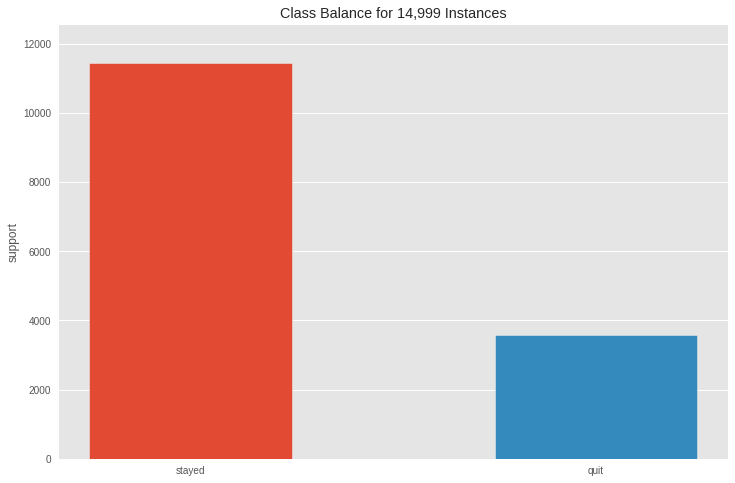

In [15]:
visualizer = ClassBalance(labels=['stayed', 'quit']).fit(hr_data.quit)
visualizer.show()

We do have class imbalance! We will use "Stratified balanced sampling" from unbalanced data.
 

**Create Training and Test Sets**

In [18]:
X = hr_data.loc[:, hr_data.columns != 'quit']
y = hr_data.quit

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify=y)

We used stratify to overcome class imbalance problem.

**Build a Decision Tree Classifier with Interactive Controls**

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [28]:
@interact
def plot_tree(crit=['gini', 'entropy'],
              split=['best', 'random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
  estimator = DecisionTreeClassifier(random_state = 0,
                                     criterion = crit,
                                     splitter = split,
                                     max_depth = depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf)
  estimator.fit(X_train, y_train)

  train_prediction = estimator.predict(X_train)
  test_prediction  = estimator.predict(X_test)

  print('Decision Tree Training Accuracy {:.3f}'.format(accuracy_score(y_train,train_prediction)))
  print('Decision Tree Test Accuracy {:.3f}'.format(accuracy_score(y_test,test_prediction)))

  graph = Source(tree.export_graphviz(estimator, out_file=None,
                                      feature_names=X_train.columns,
                                      class_names=['stayed', 'quit'],
                                      filled=True))
  
  display(Image(data=graph.pipe(format='png')))

  return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Build a Random Forest Classifier with Interactive Controls**

In [29]:
@interact
def plot_tree_rf(crit=['gini', 'entropy'],
                 bootstrap=['True', 'False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100, continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
  estimator = RandomForestClassifier(random_state = 0,
                                     criterion = crit,
                                     bootstrap = bootstrap,
                                     n_estimators = forests,
                                     max_depth = depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf,
                                     n_jobs=-1,
                                     verbose=False)
  estimator.fit(X_train, y_train)

  train_prediction = estimator.predict(X_train)
  test_prediction  = estimator.predict(X_test)

  print('Random Forest Training Accuracy {:.3f}'.format(accuracy_score(y_train,train_prediction)))
  print('Random Forest Test Accuracy {:.3f}'.format(accuracy_score(y_test,test_prediction)))

  num_tree=estimator[0]
  print("\Visualizing Tree:", 0)

  graph = Source(tree.export_graphviz(num_tree, out_file=None,
                                      feature_names=X_train.columns,
                                      class_names=['stayed', 'quit'],
                                      filled=True))
  
  display(Image(data=graph.pipe(format='png')))

  return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Feature Importance Plots and Evaluation Metrics**

In [30]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

In [31]:
rf = RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0,
                       verbose=False, warm_start=False)

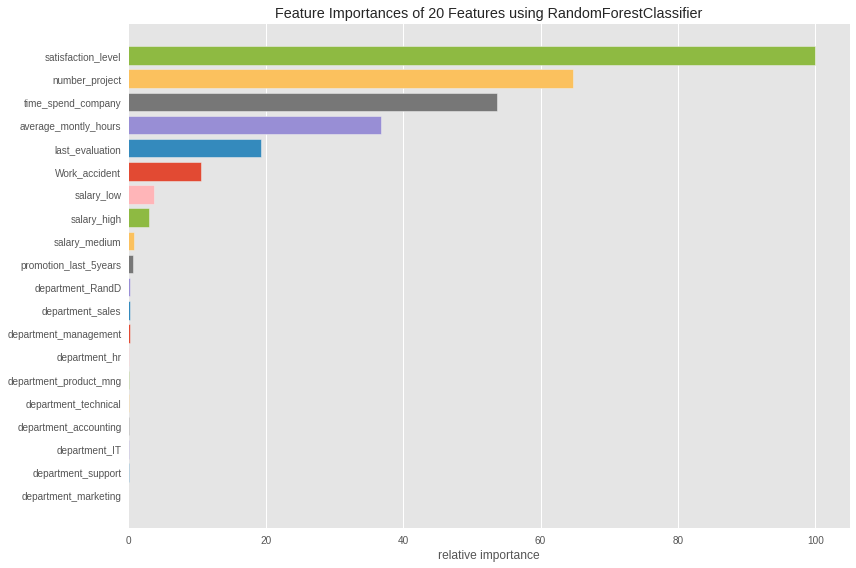

In [32]:
viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show()

In [33]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

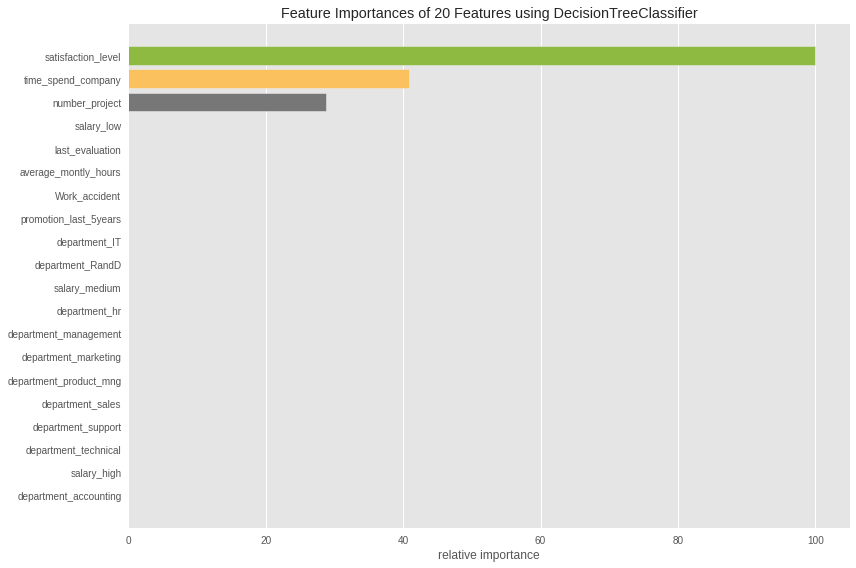

In [34]:
viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show()

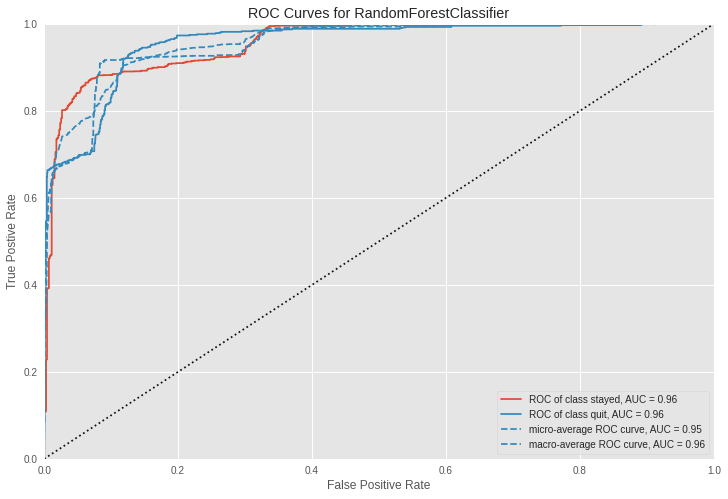

In [35]:
## Plotting Code ##
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();

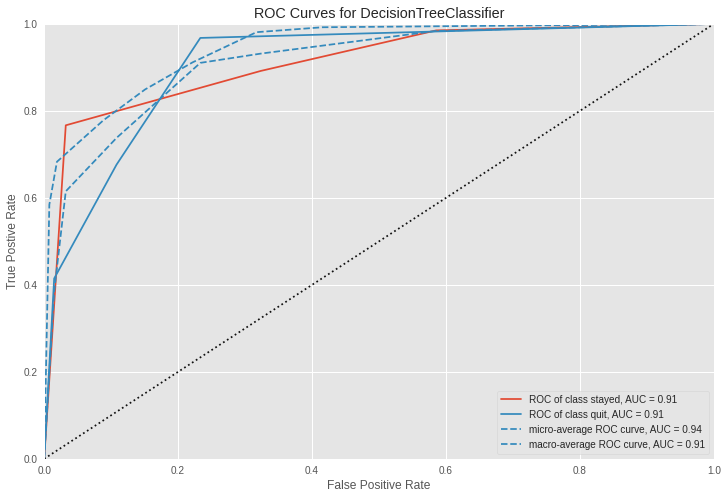

In [36]:
## Plotting Code ##
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

visualizer = ROCAUC(dt, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();